In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [4]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [5]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [6]:
#Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3905ff00cf01ef20c30249b14e47d631"
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=3905ff00cf01ef20c30249b14e47d631


In [7]:
#In the next cell, add the following code that we used to generate the random latitudes. Also, we'll create a similar code snippet that will generate longitudes. To ensure enough latitudes and longitudes, we'll start with 1,500. In addition, we'll pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function.
# Create a set of random latitude and longitude combinations.When we run this cell, the output is a zip object in memory.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-32.63848115720689 -147.6144696392495
-24.318501068228912 150.14393528055672
57.112426164097855 -52.549421102837854
-40.647316210858115 158.35149962018488
-59.261317915926725 7.665984828418317
-65.63980138563673 121.03423345518166
-57.90498915586474 -9.847371766605136
-82.92442970955734 112.90764550369477
-36.55227811922566 -162.89290549083267
78.95670167659421 173.0321035418366
-61.86988653027254 -127.57281071961145
15.34356145665565 -65.8735630078914
-50.474126494737874 170.17630441834706
9.617252176527288 146.2026237400445
-19.59660882343715 140.9021189370393
-86.56448895152988 29.352043513455953
60.82294462773859 -100.01722199782012
24.000240148128782 152.79779315301164
73.2292996733579 -179.34069538593332
22.156225826970427 -155.04313013717828
-33.0876007431028 25.990050427646537
-13.317244914149 28.944161242477776
85.47834854325708 -115.0595884108579
78.28680416716824 72.83017131841396
-29.038737998476314 -96.44408028235017
-30.502331036066167 -35.21245663873694
66.57479867027789

-25.716114894811128 25.552564415084248
10.806391822525427 44.71346500410857
20.30856746867758 6.460408441348534
29.639023930583278 -58.346853799710516
28.026036958048095 102.41673870388058
3.996741708882908 162.20558942192372
-13.051332718185009 -140.50546506291616
-45.86817640257959 60.89363984136793
15.343984867277442 74.98386087888775
-12.724363828872299 14.77733541822576
-44.236225239356756 12.803257466718975
49.092370207897375 -75.45131628522442
44.36976211783386 -17.2296297168796
-86.81139910286689 126.08927384998418
55.426114301379926 -34.21941258104141
-5.743690900137437 170.78846740408375
-5.290749366844494 -168.55471245841983
-63.05463923517209 -179.85790889990375
-27.558162308950422 86.8900651665187
-12.193678047043917 158.2680911390181
-52.201578189340076 4.904554762389694
-44.339519852474794 159.79038470544242
57.53807356181113 101.05067602674467
5.57030175710274 148.5924629972415
27.210887768525737 77.64282585461245
51.13366713192252 160.9398145459694
36.90726529166605 -2

In [10]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

625

In [11]:
#Some of this code should look familiar, but let's break it down:We create a cities list to store city names.We iterate through the coordinates, as in our practice, and retrieve the nearest city using the latitude and longitude pair.We add a decision statement with the logical operator not in to determine whether the found city is already in the cities list. If not, then we'll use the append() function to add it. We are doing this because among the 1,500 latitudes and longitudes, there might be duplicates, which will retrieve duplicate cities, and we want to be sure we capture only the unique cities.

In [12]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | biloela
Processing Record 3 of Set 1 | paamiut
Processing Record 4 of Set 1 | ulladulla
Processing Record 5 of Set 1 | hermanus
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | avarua
Processing Record 9 of Set 1 | pevek
Processing Record 10 of Set 1 | rikitea
Processing Record 11 of Set 1 | arroyo
Processing Record 12 of Set 1 | kaitangata
Processing Record 13 of Set 1 | lorengau
Processing Record 14 of Set 1 | mount isa
Processing Record 15 of Set 1 | kruisfontein
Processing Record 16 of Set 1 | thompson
Processing Record 17 of Set 1 | katsuura
Processing Record 18 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 19 of Set 1 | kahului
Processing Record 20 of Set 1 | adelaide
Processing Record 21 of Set 1 | ndola
Processing Record 22 of Set 1 | yellowknife
Processing Record 23 

Processing Record 41 of Set 4 | souillac
Processing Record 42 of Set 4 | kodiak
Processing Record 43 of Set 4 | airai
Processing Record 44 of Set 4 | ketchikan
Processing Record 45 of Set 4 | biskamzha
Processing Record 46 of Set 4 | klaksvik
Processing Record 47 of Set 4 | qasigiannguit
Processing Record 48 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 49 of Set 4 | lasa
Processing Record 50 of Set 4 | chokurdakh
Processing Record 1 of Set 5 | saint-georges
Processing Record 2 of Set 5 | terney
Processing Record 3 of Set 5 | coihaique
Processing Record 4 of Set 5 | canto do buriti
Processing Record 5 of Set 5 | matagami
Processing Record 6 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 7 of Set 5 | amderma
City not found. Skipping...
Processing Record 8 of Set 5 | atambua
Processing Record 9 of Set 5 | petropavlovsk-kamchatskiy
Processing Record 10 of Set 5 | saint anthony
Processing Record 11 of Set 5 | harper
Processing Record 12 of Set 5 | 

Processing Record 24 of Set 8 | bixby
Processing Record 25 of Set 8 | portland
Processing Record 26 of Set 8 | feldkirchen an der donau
Processing Record 27 of Set 8 | palora
Processing Record 28 of Set 8 | beloha
Processing Record 29 of Set 8 | yatou
Processing Record 30 of Set 8 | kazalinsk
City not found. Skipping...
Processing Record 31 of Set 8 | shestakovo
Processing Record 32 of Set 8 | icatu
Processing Record 33 of Set 8 | choix
Processing Record 34 of Set 8 | chimbote
Processing Record 35 of Set 8 | havelock
Processing Record 36 of Set 8 | beringovskiy
Processing Record 37 of Set 8 | coquimbo
Processing Record 38 of Set 8 | brattleboro
Processing Record 39 of Set 8 | pochutla
Processing Record 40 of Set 8 | saint george
Processing Record 41 of Set 8 | palmer
Processing Record 42 of Set 8 | novyy urengoy
Processing Record 43 of Set 8 | georgetown
Processing Record 44 of Set 8 | antofagasta
Processing Record 45 of Set 8 | nikko
Processing Record 46 of Set 8 | miandrivazo
Process

Processing Record 16 of Set 12 | catalao
Processing Record 17 of Set 12 | kamina
Processing Record 18 of Set 12 | san quintin
Processing Record 19 of Set 12 | tsentralnyy
City not found. Skipping...
Processing Record 20 of Set 12 | lalomanu
City not found. Skipping...
Processing Record 21 of Set 12 | palu
Processing Record 22 of Set 12 | vianopolis
Processing Record 23 of Set 12 | itarema
Processing Record 24 of Set 12 | zhaodong
Processing Record 25 of Set 12 | finnsnes
Processing Record 26 of Set 12 | kuche
City not found. Skipping...
Processing Record 27 of Set 12 | samalaeulu
City not found. Skipping...
Processing Record 28 of Set 12 | serebryansk
Processing Record 29 of Set 12 | trairi
Processing Record 30 of Set 12 | parral
Processing Record 31 of Set 12 | copiapo
Processing Record 32 of Set 12 | marsa matruh
Processing Record 33 of Set 12 | benguela
Processing Record 34 of Set 12 | asau
Processing Record 35 of Set 12 | sofiysk
City not found. Skipping...
Processing Record 36 of 

In [13]:
len(city_data)

564

In [14]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,45.48,95,99,1.36,NZ,2021-07-17 23:23:37
1,Biloela,-24.4167,150.5000,57.65,44,0,13.04,AU,2021-07-17 23:23:37
2,Paamiut,61.9940,-49.6678,48.02,91,100,7.96,GL,2021-07-17 23:23:38
3,Ulladulla,-35.3500,150.4667,58.87,59,2,9.82,AU,2021-07-17 23:23:38
4,Hermanus,-34.4187,19.2345,54.81,90,7,9.31,ZA,2021-07-17 23:23:38
5,Albany,42.6001,-73.9662,73.98,91,97,1.01,US,2021-07-17 23:20:49
6,Cape Town,-33.9258,18.4232,56.08,90,0,4.61,ZA,2021-07-17 23:23:39
7,Avarua,-21.2078,-159.7750,80.65,74,20,14.97,CK,2021-07-17 23:23:39
8,Pevek,69.7008,170.3133,46.04,78,98,8.93,RU,2021-07-17 23:23:40
9,Rikitea,-23.1203,-134.9692,71.60,75,100,26.62,PF,2021-07-17 23:23:40


In [15]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [16]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2021-07-17 23:23:37,-46.1927,168.8643,45.48,95,99,1.36
1,Biloela,AU,2021-07-17 23:23:37,-24.4167,150.5000,57.65,44,0,13.04
2,Paamiut,GL,2021-07-17 23:23:38,61.9940,-49.6678,48.02,91,100,7.96
3,Ulladulla,AU,2021-07-17 23:23:38,-35.3500,150.4667,58.87,59,2,9.82
4,Hermanus,ZA,2021-07-17 23:23:38,-34.4187,19.2345,54.81,90,7,9.31
5,Albany,US,2021-07-17 23:20:49,42.6001,-73.9662,73.98,91,97,1.01
6,Cape Town,ZA,2021-07-17 23:23:39,-33.9258,18.4232,56.08,90,0,4.61
7,Avarua,CK,2021-07-17 23:23:39,-21.2078,-159.7750,80.65,74,20,14.97
8,Pevek,RU,2021-07-17 23:23:40,69.7008,170.3133,46.04,78,98,8.93
9,Rikitea,PF,2021-07-17 23:23:40,-23.1203,-134.9692,71.60,75,100,26.62


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

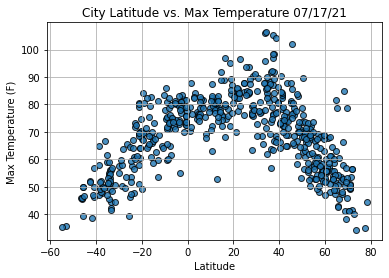

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

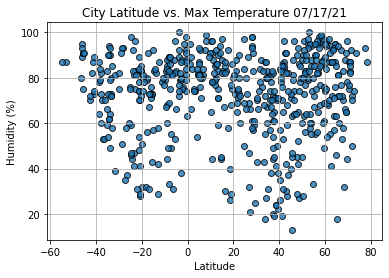

In [20]:
# Build the scatter plot for latitude vs. Humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

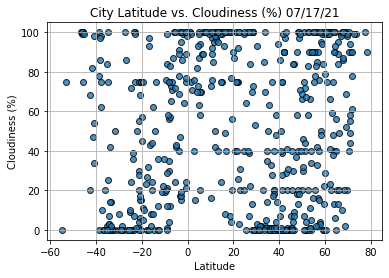

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

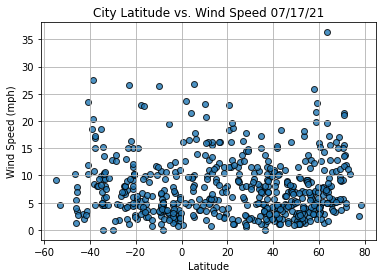

In [22]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [23]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [24]:
index13 = city_data_df.loc[13]
index13

City                    Mount Isa
Country                        AU
Date          2021-07-17 23:23:42
Lat                      -20.7333
Lng                         139.5
Max Temp                    60.57
Humidity                       41
Cloudiness                      6
Wind Speed                  10.36
Name: 13, dtype: object

In [25]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3      False
4      False
       ...  
559    False
560     True
561    False
562    False
563     True
Name: Lat, Length: 564, dtype: bool

In [26]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Paamiut,GL,2021-07-17 23:23:38,61.9940,-49.6678,48.02,91,100,7.96
5,Albany,US,2021-07-17 23:20:49,42.6001,-73.9662,73.98,91,97,1.01
8,Pevek,RU,2021-07-17 23:23:40,69.7008,170.3133,46.04,78,98,8.93
10,Arroyo,ES,2021-07-17 23:23:40,41.6096,-4.7969,72.07,53,0,14.97
15,Thompson,CA,2021-07-17 23:23:42,55.7435,-97.8558,59.16,55,90,2.30
...,...,...,...,...,...,...,...,...,...
555,Novovorontsovka,UA,2021-07-17 23:27:01,47.5004,33.9175,77.52,64,37,8.16
556,Salym,RU,2021-07-17 23:27:02,60.0625,71.4789,46.94,95,29,2.98
557,Riyadh,SA,2021-07-17 23:24:46,24.6877,46.7219,87.94,50,100,9.04
560,Adre,TD,2021-07-17 23:27:02,13.4667,22.2000,75.31,71,100,13.47


In [27]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

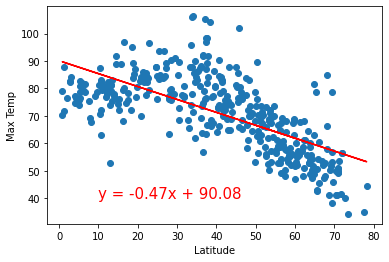

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

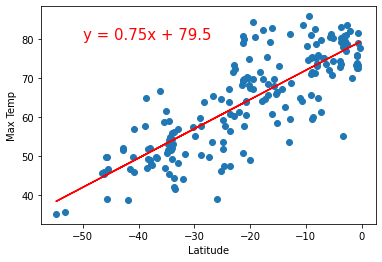

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,80))

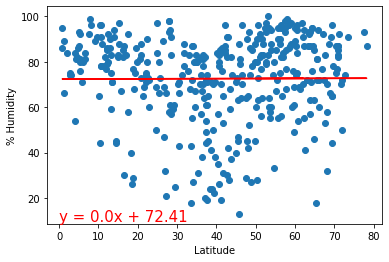

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(0,10))

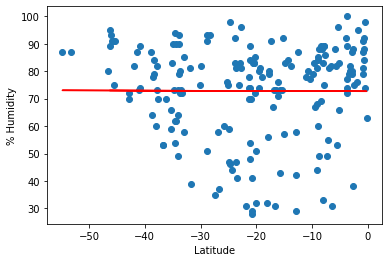

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

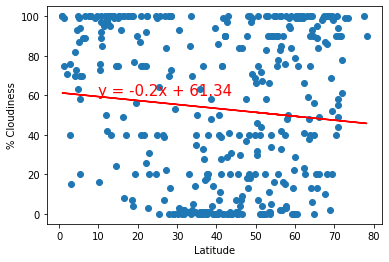

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,60))

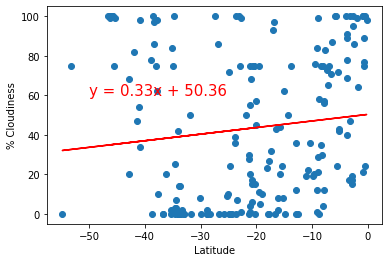

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

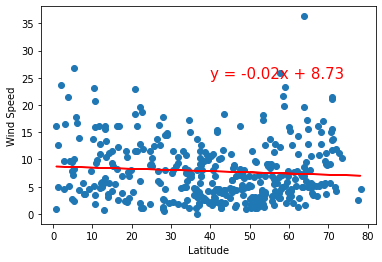

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,25))


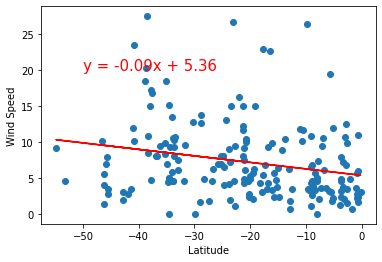

In [35]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))